<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r3-i2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-15-m-1-r3.csv?token=AKVFSOHBOJDR6J3GWCSIHIS63IDNE')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-15-m-11-r3.csv?token=AKVFSOBVUGL7OSHKLIU3Z3S63IDNK')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-4-m-1-r3.csv?token=AKVFSOFJVN2SU337SRDUACS63IDNO')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-4-m-11-r3.csv?token=AKVFSOBTNGZEFPAKOQDGTF263IDTO')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-6-m-1-r3.csv?token=AKVFSOEXLXZI6KB3QEGSKBS63IDTS')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-6-m-11-r3.csv?token=AKVFSOBGN5DOBNFHAXJR5ZK63IDTY')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-9-m-1-r3.csv?token=AKVFSOCRIOVDJZPQD4GKTTC63IDT4')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-9-m-11-r3.csv?token=AKVFSOF7ZVZ7DU3SDSON6VS63IDUA')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-normal-n-0-15-r3.csv?token=AKVFSOHXRRZMQOHJNEFRN2K63IDUE')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-normal-n-0-4-r3.csv?token=AKVFSOCNXUN2XUCZHTYDW6C63IDUM')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-normal-n-0-6-r3.csv?token=AKVFSOD55RGAHOBPZQ7DHD263IDUQ')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-normal-n-0-9-r3.csv?token=AKVFSOA7WJ7IWQUUJCPXVYC63IDUW')

In [23]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(33259, 26)
(28688, 26)
(32130, 26)
(27630, 26)
(32124, 26)
(27630, 26)
(32160, 26)
(27624, 26)
(20553, 26)
(19458, 26)
(19457, 26)
(19454, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r3-train.csv',index=False)

In [25]:
df = pd.read_csv('fft-r3-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,15,1,4,1,1,4,3,9,1,1,23,7,2,3,2,0.666667,12,8,1,8,8,4,8,3,27,0
1,15,1,4,1,1,4,3,9,1,1,23,7,2,3,2,0.666667,12,8,1,8,8,4,8,3,27,0
2,15,1,4,1,1,4,3,9,1,1,23,7,2,3,2,0.666667,12,8,1,8,8,4,8,3,27,0
3,15,1,4,1,1,4,3,9,1,1,23,7,2,3,2,0.666667,12,8,1,8,8,4,8,3,27,0
4,19,1,4,1,1,4,3,10,0,0,23,7,1,4,3,0.750000,16,7,2,8,14,4,4,3,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320162,3275323,1,4,7,1,4,3,9,18,2,15,15,20057,4,1,0.250000,9,1,2,2,2,4,561596,21,189,1
320163,3275842,1,4,7,1,4,3,9,17,1,15,15,30089,5,2,0.400000,14,1,1,1,1,4,842492,21,189,0
320164,3276048,1,4,7,1,4,3,9,18,2,15,15,30091,4,1,0.250000,10,1,1,1,1,4,842548,21,189,0
320165,3276342,1,4,7,1,4,3,9,17,1,15,15,30089,5,2,0.400000,14,2,1,2,2,4,842492,21,189,0


In [26]:
df.shape

(320167, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-15-m-12-r3.csv?token=AKVFSOE4XEDCYO4VR63SV2C63IE7C')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-15-m-7-r3.csv?token=AKVFSOCVVADXM4BZ62CH6JC63IE7I')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-4-m-12-r3.csv?token=AKVFSOFMSCBTCNUCCUW6U2S63IE7M')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-4-m-7-r3.csv?token=AKVFSOFSSLE5GSESBLKWTJS63IE7Q')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-6-m-12-r3.csv?token=AKVFSOECXTT4CSEPBDOMS2263IE7U')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-6-m-7-r3.csv?token=AKVFSOBDH2426Q5P6M3M7QK63IE7Y')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-9-m-12-r3.csv?token=AKVFSODN2MYZWU74647AA7263IE74')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-9-m-7-r3.csv?token=AKVFSODUZCKPISNRBNB6GWK63IE76')

In [28]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(27630, 26)
(28688, 26)
(26430, 26)
(27630, 26)
(26430, 26)
(27590, 26)
(26430, 26)
(27630, 26)


In [29]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,15,1,4,1,1,4,3,9,1,1,23,7,2,3,2,0.666667,12,8,1,8,8,4,8,3,27,0
1,19,1,4,1,1,4,3,10,0,0,23,7,1,4,3,0.750000,16,7,2,8,14,4,4,3,30,0
2,332,1,4,1,1,4,3,9,1,1,23,7,11,3,2,0.666667,12,6,3,8,18,4,44,3,27,0
3,363,1,4,1,1,4,3,9,0,0,23,7,12,4,3,0.750000,16,5,4,8,20,4,48,3,27,0
4,604,1,4,1,1,4,3,9,1,1,23,7,20,3,2,0.666667,12,4,5,8,20,4,80,3,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32119,3265581,1,4,5,2,2,3,9,0,0,23,7,30081,4,3,0.750000,23,5,2,6,10,4,601620,15,135,0
32120,3265588,1,4,5,3,2,3,9,0,0,23,7,30081,4,3,0.750000,30,4,3,6,12,4,902430,15,135,0
32121,3265595,1,4,5,4,2,3,9,0,0,23,7,30081,4,3,0.750000,37,3,4,6,12,4,1203240,15,135,0
32122,3265602,1,4,5,5,3,3,9,0,0,23,7,30081,4,3,0.750000,44,2,5,6,10,4,2256075,15,135,0


Processing

In [30]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [32]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.671989,0.348134,0.011609,-0.016679,NaN,0.631690,-0.034529,0.192938,-0.905813,-0.956366,-0.411140,-0.099563,0.196831,0.073801,0.075482,-0.256576,0.070390,0.348134,0.501095,0.006626
inport,-0.671989,1.000000,-0.219977,0.060086,-0.086391,NaN,-0.515120,0.101047,0.189375,0.660743,0.566842,0.374175,-0.014864,-0.227054,-0.183553,-0.148963,0.715215,0.012777,-0.219977,-0.358961,-0.005017
cache_coherence_type,0.348134,-0.219977,1.000000,0.349829,-0.502851,NaN,0.039993,0.000574,-0.033073,-0.387391,-0.375729,-0.552996,0.038838,-0.010018,0.021867,0.024508,-0.087840,0.298433,1.000000,0.954488,-0.008775
flit_id,0.011609,0.060086,0.349829,1.000000,-0.139389,NaN,-0.105458,0.019254,0.027135,-0.013911,0.010281,0.509465,0.015531,-0.003028,0.009487,0.020826,0.030904,0.656048,0.349829,0.299914,0.006139
flit_type,-0.016679,-0.086391,-0.502851,-0.139389,1.000000,NaN,0.151601,-0.027694,-0.039029,0.019980,-0.014782,0.370079,-0.166610,0.150963,-0.011872,-0.011877,-0.044453,0.032040,-0.502851,-0.431099,-0.008862
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.631690,-0.515120,0.039993,-0.105458,0.151601,NaN,1.000000,-0.036796,0.000762,-0.616939,-0.597279,-0.191416,-0.041932,0.170030,0.097194,0.090477,-0.312445,-0.033963,0.039993,0.327175,0.000408
traversal_id,-0.034529,0.101047,0.000574,0.019254,-0.027694,NaN,-0.036796,1.000000,0.061953,0.036114,0.007417,0.040097,0.004208,0.004791,0.006828,-0.020812,0.139441,0.554317,0.000574,-0.012028,-0.236975
hop_count,0.192938,0.189375,-0.033073,0.027135,-0.039029,NaN,0.000762,0.061953,1.000000,0.121562,-0.317688,0.086545,-0.195036,-0.042661,-0.180351,-0.134106,0.593323,0.038952,-0.033073,-0.033443,0.097123
current_hop,-0.905813,0.660743,-0.387391,-0.013911,0.019980,NaN,-0.616939,0.036114,0.121562,1.000000,0.887147,0.452774,0.035808,-0.186875,-0.114622,-0.107196,0.370203,-0.074932,-0.387391,-0.530838,0.060556


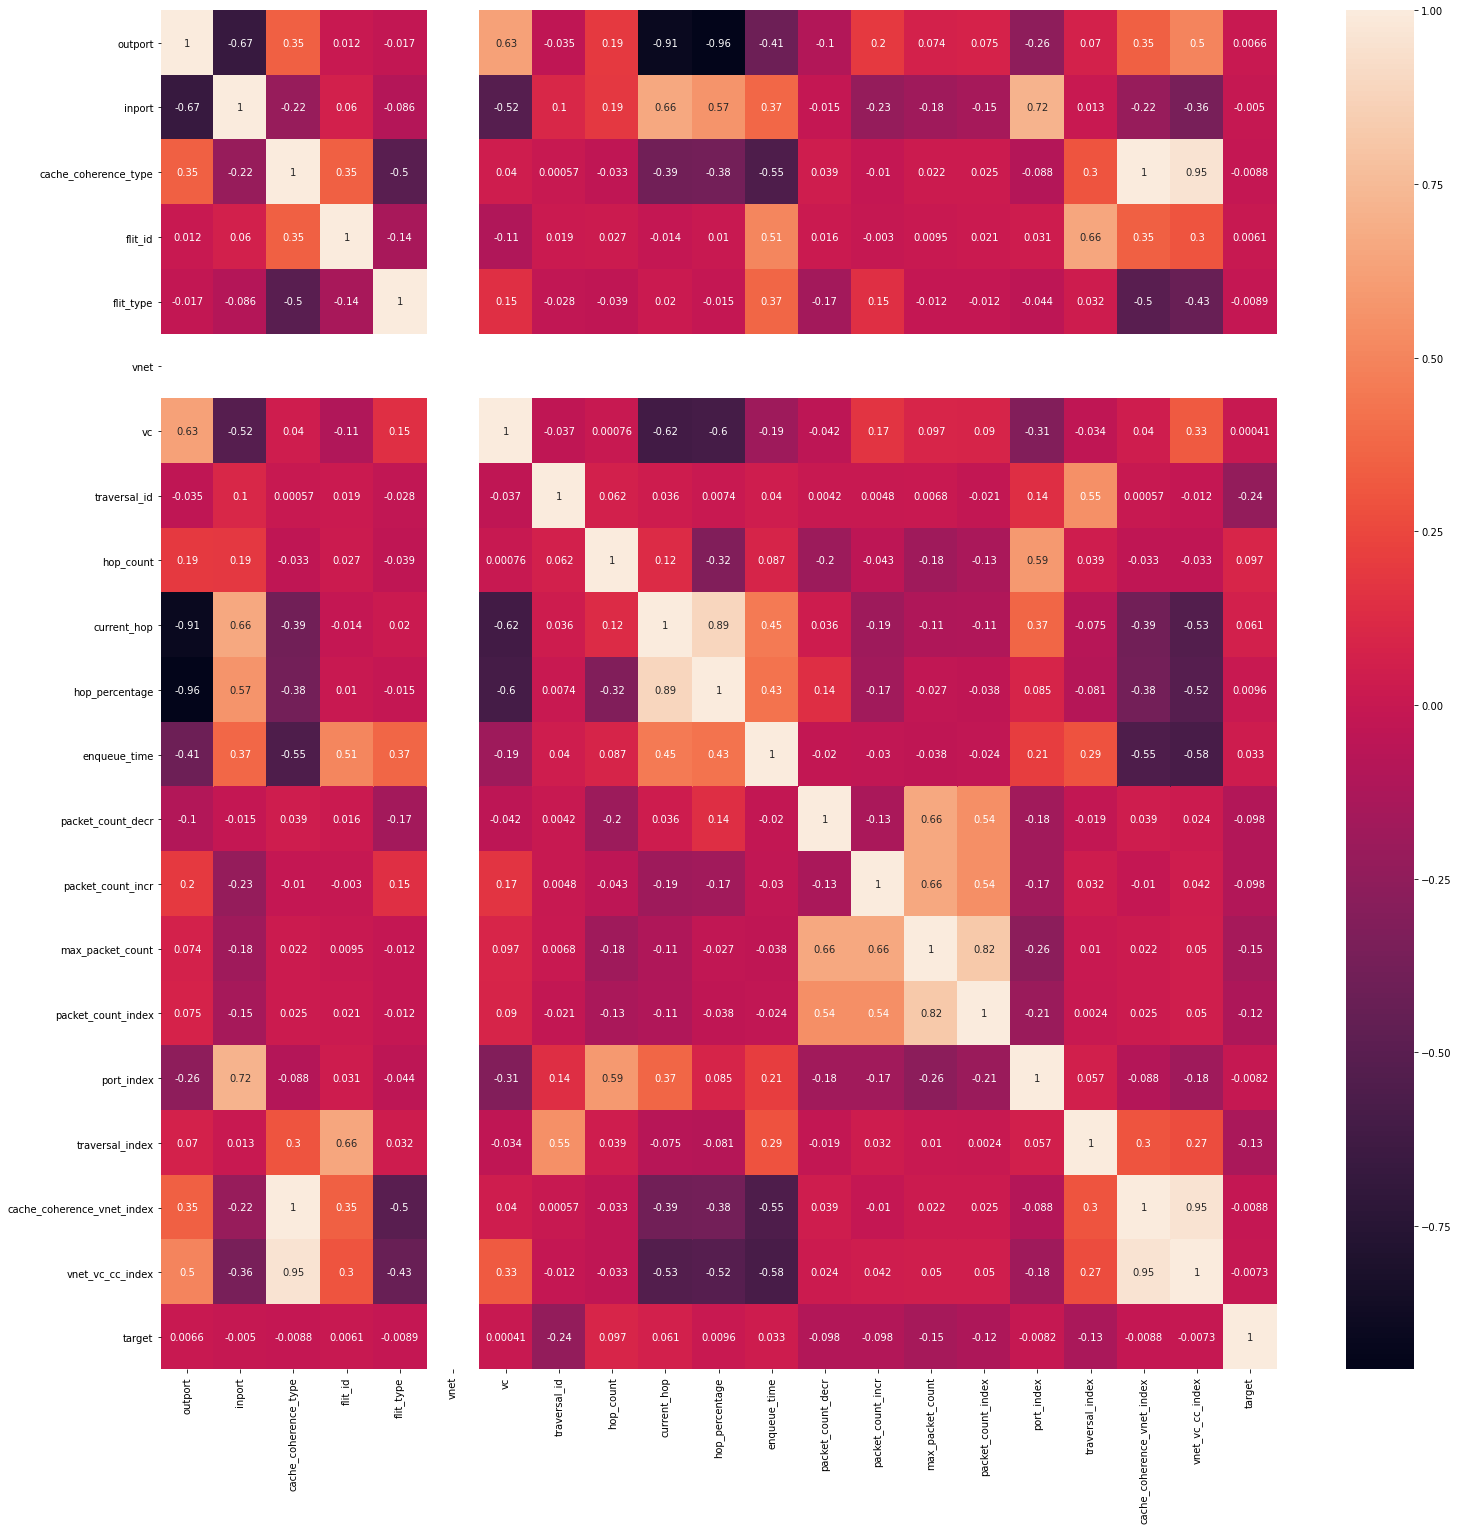

In [33]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [35]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['hop_percentage', 'outport', 'vnet_vc_cc_index', 'cache_coherence_type']

In [0]:
#df = df.drop(columns=[''])

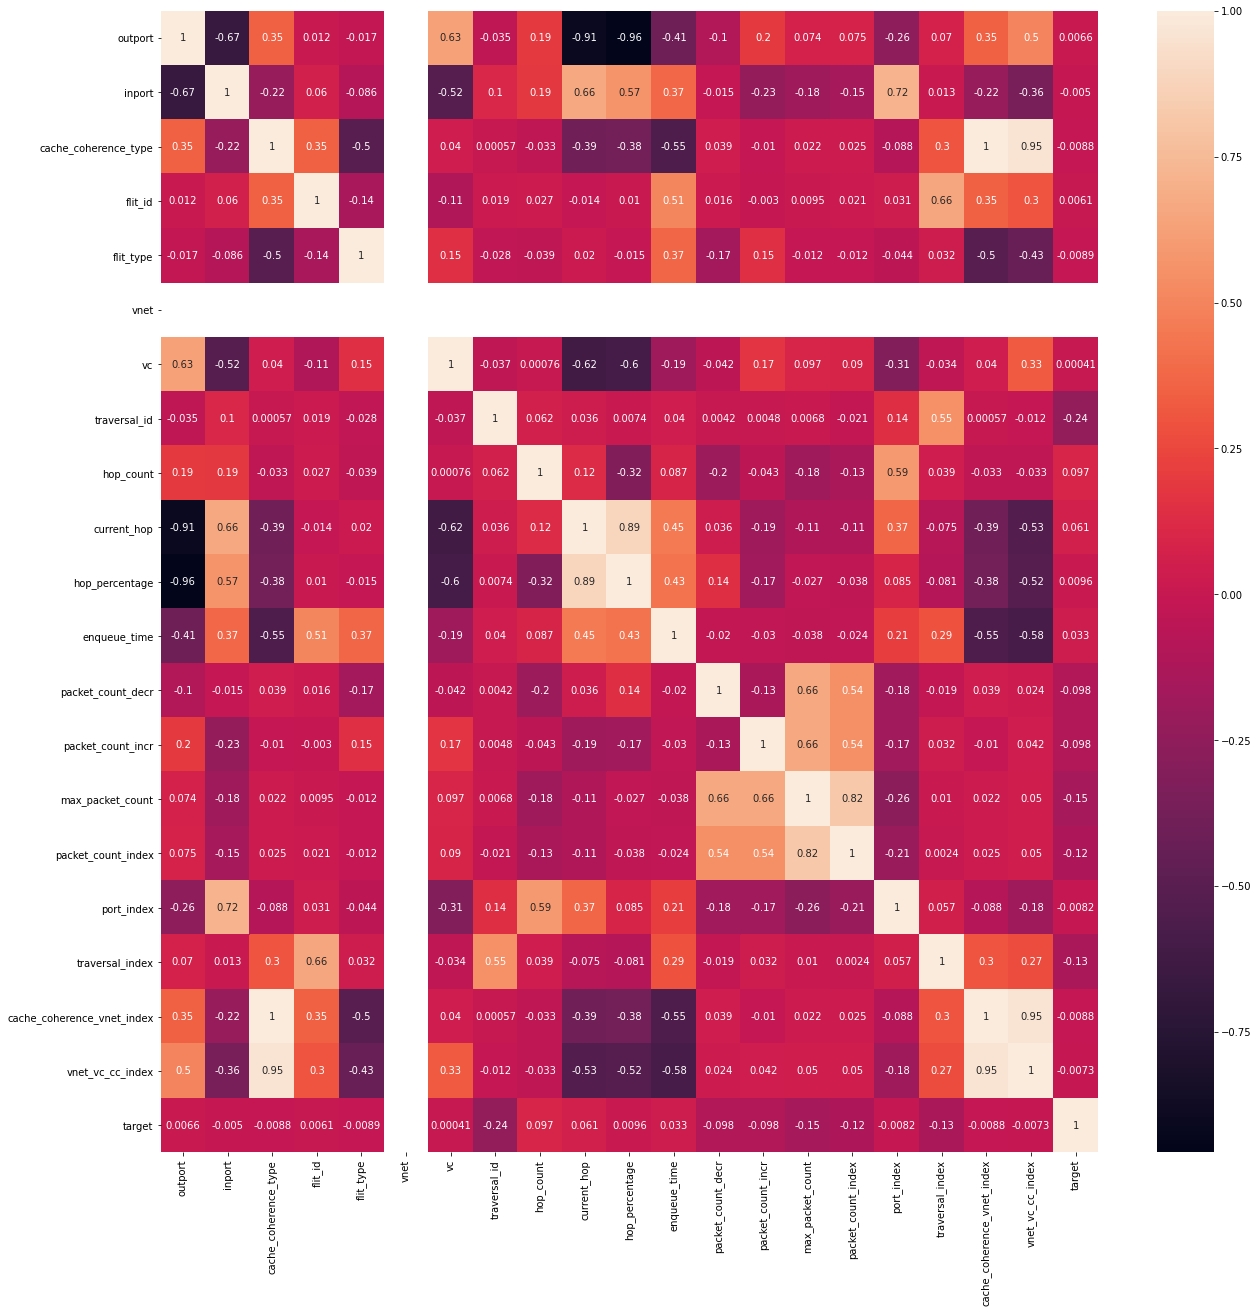

In [37]:
plt.figure(figsize=(21,21))
sns.heatmap(df.corr(), annot = True)
plt.show()

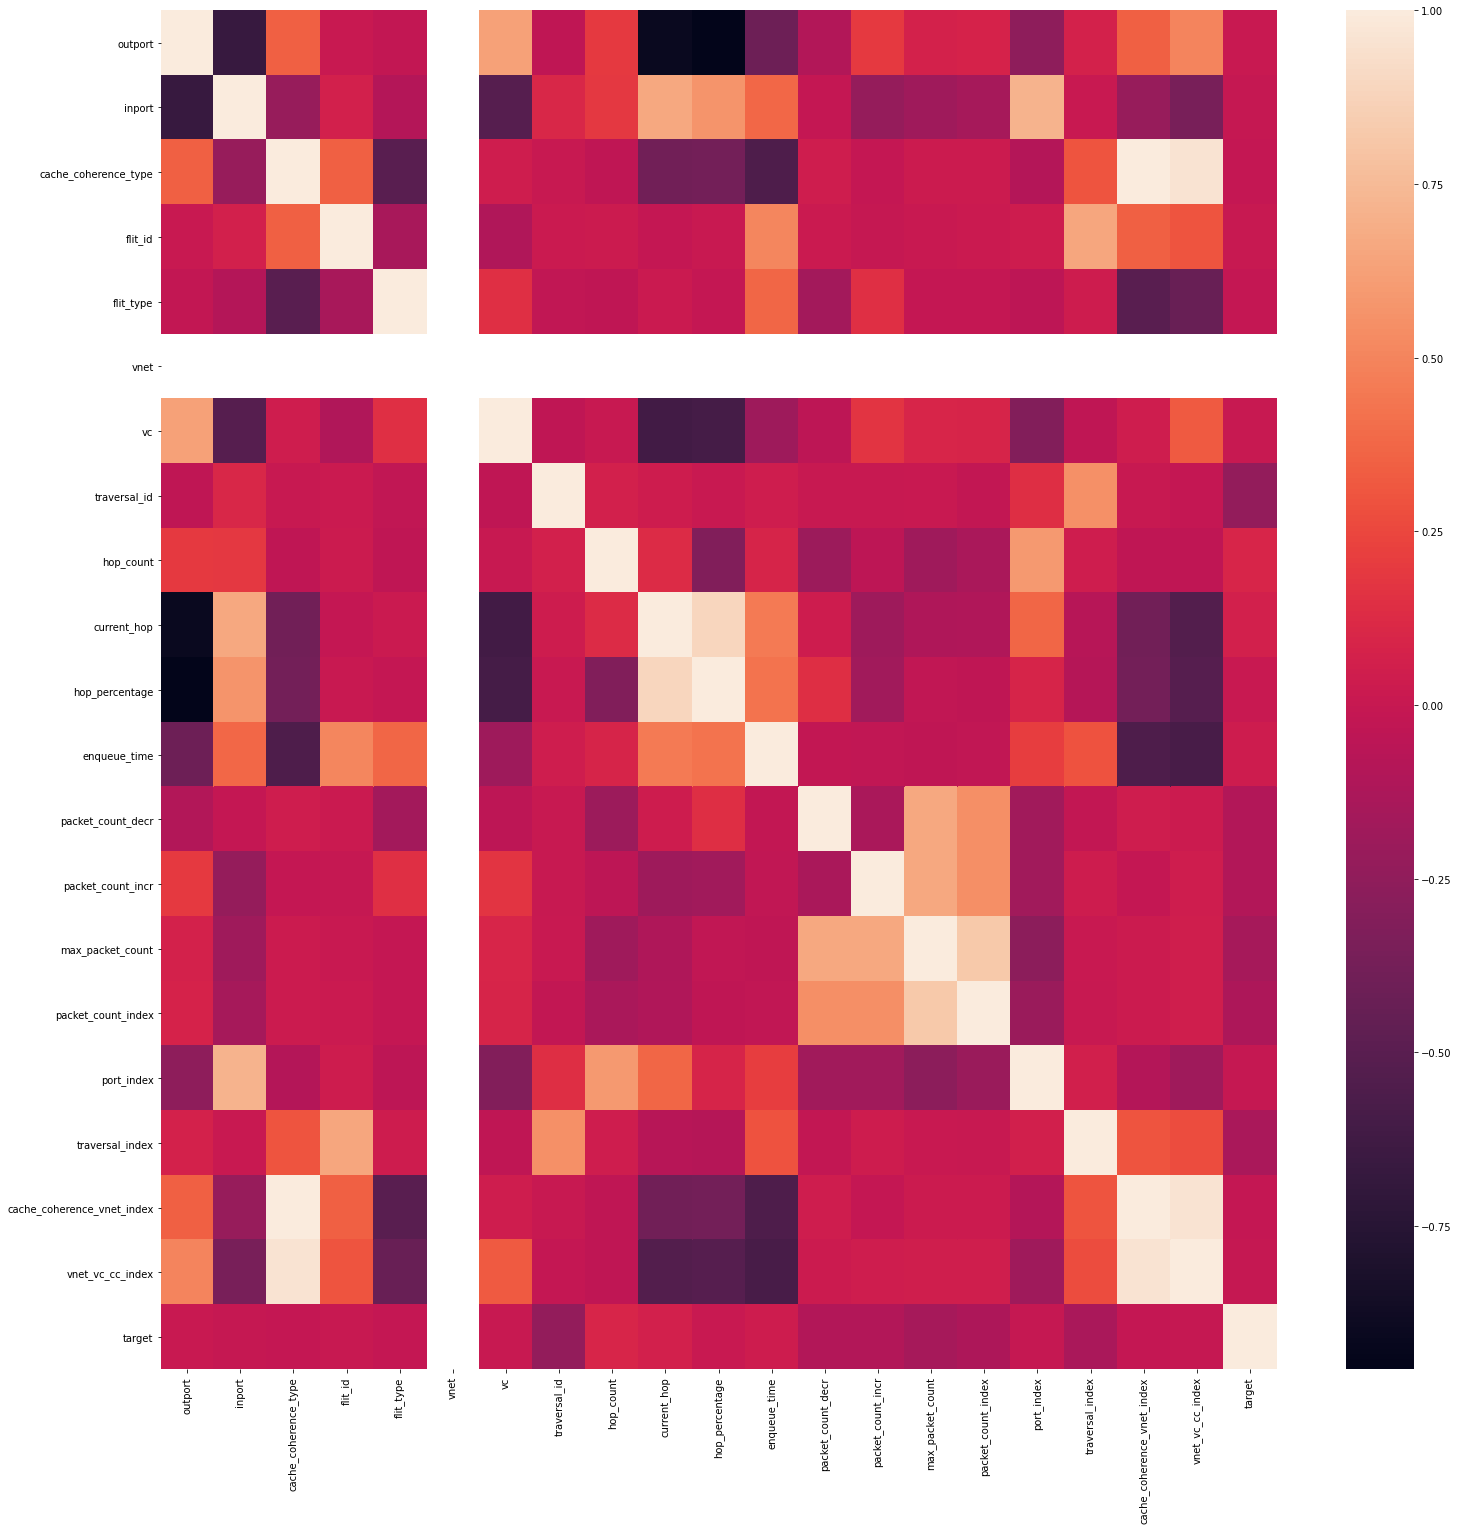

In [38]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [40]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.25,1.0,0.0,0.0,1.0,0.0,0.000000,0.000033,0.25,0.50,0.666667,0.142857,0.056,0.000,0.056,0.001737,1.0,0.000001,0.0,0.000000
1,0.25,1.0,0.0,0.0,1.0,0.0,0.000000,0.000033,0.25,0.50,0.666667,0.142857,0.056,0.000,0.056,0.001737,1.0,0.000001,0.0,0.000000
2,0.25,1.0,0.0,0.0,1.0,0.0,0.000000,0.000033,0.25,0.50,0.666667,0.142857,0.056,0.000,0.056,0.001737,1.0,0.000001,0.0,0.000000
3,0.25,1.0,0.0,0.0,1.0,0.0,0.000000,0.000033,0.25,0.50,0.666667,0.142857,0.056,0.000,0.056,0.001737,1.0,0.000001,0.0,0.000000
4,0.25,1.0,0.0,0.0,1.0,0.0,0.333333,0.000000,0.50,0.75,0.750000,0.214286,0.048,0.008,0.056,0.003225,1.0,0.000000,0.0,0.013333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320162,0.25,1.0,1.0,0.0,1.0,0.0,0.000000,0.666467,0.50,0.25,0.250000,0.089286,0.000,0.008,0.008,0.000248,1.0,0.207492,1.0,0.720000
320163,0.25,1.0,1.0,0.0,1.0,0.0,0.000000,0.999834,0.75,0.50,0.400000,0.178571,0.000,0.000,0.000,0.000000,1.0,0.311276,1.0,0.720000
320164,0.25,1.0,1.0,0.0,1.0,0.0,0.000000,0.999900,0.50,0.25,0.250000,0.107143,0.000,0.000,0.000,0.000000,1.0,0.311296,1.0,0.720000
320165,0.25,1.0,1.0,0.0,1.0,0.0,0.000000,0.999834,0.75,0.50,0.400000,0.178571,0.008,0.000,0.008,0.000248,1.0,0.311276,1.0,0.720000


In [41]:
train_X[train_X.duplicated()].shape

(5382, 20)

In [42]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 20)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.25,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.333333,0.500000,0.75,0.214286,0.027273,0.000000,0.027273,0.000957,1.0,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000333,0.333333,0.500000,0.75,0.214286,0.018182,0.009091,0.027273,0.001595,1.0,0.000015,0.000000,0.000000
2,0.25,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000632,0.333333,0.500000,0.75,0.214286,0.009091,0.018182,0.027273,0.001595,1.0,0.000028,0.000000,0.000000
3,0.25,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000931,0.666667,0.500000,0.60,0.214286,0.000000,0.027273,0.027273,0.000957,1.0,0.000041,0.000000,0.000000
4,0.00,0.25,0.000000,0.0,1.0,0.0,0.000000,0.001962,0.000000,0.500000,1.00,0.214286,0.081818,0.000000,0.081818,0.002871,0.0,0.000087,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27625,1.00,0.00,0.166667,0.0,1.0,0.0,0.333333,0.999435,0.333333,0.000000,0.00,0.500000,0.018182,0.109091,0.127273,0.012121,0.0,0.088890,0.166667,0.146667
27626,0.25,0.00,1.000000,0.0,1.0,0.0,0.666667,0.999401,0.000000,0.000000,0.00,0.035714,0.009091,0.118182,0.127273,0.008612,0.0,0.311110,1.000000,0.906667
27627,0.00,0.25,0.333333,0.0,1.0,0.0,0.000000,0.999435,0.333333,0.666667,1.00,0.339286,0.000000,0.127273,0.127273,0.004466,0.0,0.133336,0.333333,0.240000
27628,0.25,1.00,1.000000,0.0,1.0,0.0,0.000000,0.999933,0.666667,0.333333,0.40,0.178571,0.009091,0.000000,0.009091,0.000319,1.0,0.311276,1.000000,0.720000


In [43]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 20)


In [44]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 20)


In [45]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 20)


In [46]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 20)


In [47]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 20)


In [48]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 20)


In [49]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 20)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [51]:
train_Y = df['target']
train_Y.value_counts()

0    241245
1     78922
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
7                 traversal_id  2647.929988
17             traversal_index   872.697273
14            max_packet_count   443.633338
8                    hop_count   335.990825
15          packet_count_index   282.813807
9                  current_hop   256.007215
13           packet_count_incr   223.211563
12           packet_count_decr   220.426866
11                enqueue_time    31.670985
16                  port_index    17.238931
0                      outport     6.734271
10              hop_percentage     6.406574
4                    flit_type     5.450585
1                       inport     3.513158
3                      flit_id     3.175299
2         cache_coherence_type     1.767931
18  cache_coherence_vnet_index     1.767931


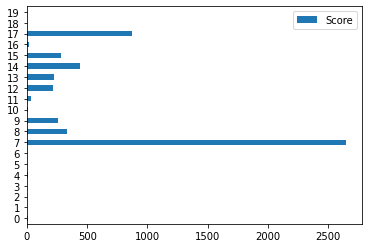

In [54]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [56]:
dt = DecisionTreeClassifier(max_depth=20,max_features=20,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r0.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [59]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 96.72826226999254
Test Prediction Score 95.04013492831933


In [60]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 93.02931596091206
Test Prediction Score 86.22071946458449
Test Prediction Score 90.53726825576996
Test Prediction Score 87.07564241766195
Test Prediction Score 89.99243284146803
Test Prediction Score 87.85791953606379
Test Prediction Score 90.77185017026108
Test Prediction Score 88.23380383640969


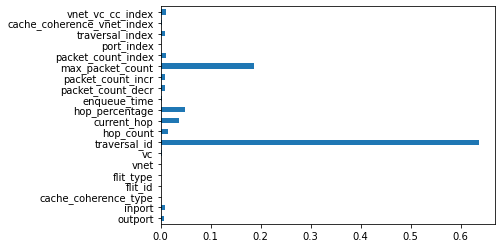

In [61]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

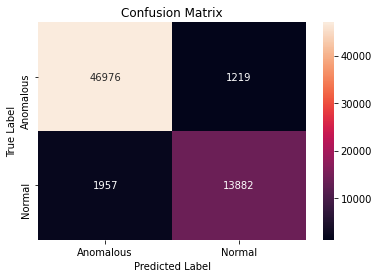

In [62]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [63]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     48195
           1       0.92      0.88      0.90     15839

    accuracy                           0.95     64034
   macro avg       0.94      0.93      0.93     64034
weighted avg       0.95      0.95      0.95     64034



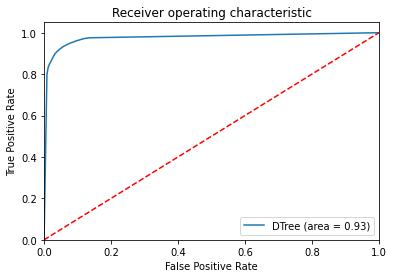

In [64]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [66]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r0.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [69]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.87584575201166
Test Prediction Score 98.82250054658462


In [70]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 94.23090843286282
Test Prediction Score 88.22155605131066
Test Prediction Score 92.0279984865683
Test Prediction Score 89.40644227289178
Test Prediction Score 91.2599318955732
Test Prediction Score 90.46031170714028
Test Prediction Score 91.94475974271661
Test Prediction Score 90.56460369163952


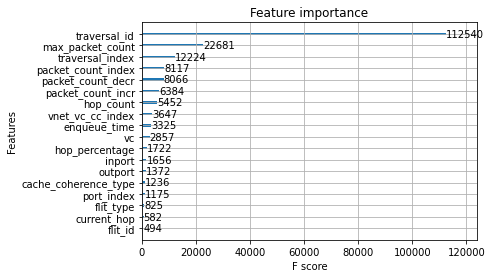

In [71]:
plot_importance(xgbc)
plt.show()

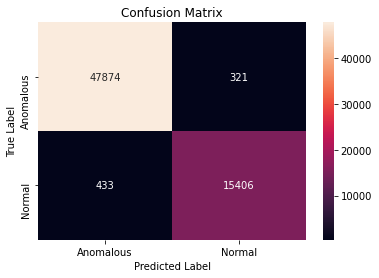

In [72]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [73]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     48195
           1       0.98      0.97      0.98     15839

    accuracy                           0.99     64034
   macro avg       0.99      0.98      0.98     64034
weighted avg       0.99      0.99      0.99     64034



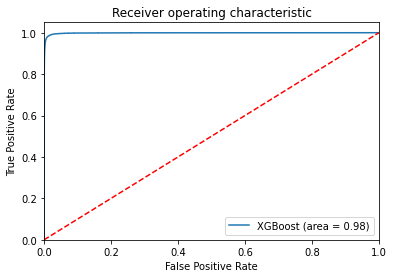

In [74]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()